In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('Exam_Score_Prediction.csv')


In [4]:
df.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


In [6]:
df.shape

(20000, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  object 
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  object 
 11  exam_difficulty   20000 non-null  object 
 12  exam_score        20000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 2.0+ MB


In [8]:
df.describe()

,student_id,age,study_hours,class_attendance,sleep_hours,exam_score
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,10000.504600,20.473300,4.007604,70.017365,7.00856,62.513225
std,5773.654959,2.284458,2.308313,17.282262,1.73209,18.908491
min,1.000000,17.000000,0.080000,40.600000,4.10000,19.599000
25%,5000.750000,18.000000,2.000000,55.100000,5.50000,48.800000
50%,10000.500000,20.000000,4.040000,69.900000,7.00000,62.600000
75%,15000.250000,22.000000,6.000000,85.000000,8.50000,76.300000
max,20001.000000,24.000000,7.910000,99.400000,9.90000,100.000000


In [9]:
df.isnull().sum()

student_id          0
age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64

In [10]:
df.columns.tolist()

['student_id',
 'age',
 'gender',
 'course',
 'study_hours',
 'class_attendance',
 'internet_access',
 'sleep_hours',
 'sleep_quality',
 'study_method',
 'facility_rating',
 'exam_difficulty',
 'exam_score']

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
target_col = "age"
df[target_col].describe()


count    20000.000000
mean        20.473300
std          2.284458
min         17.000000
25%         18.000000
50%         20.000000
75%         22.000000
max         24.000000
Name: age, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor

In [15]:
target_col = "exam_score"


In [16]:
X = df.drop(columns=["exam_score", "student_id"])
y = df[target_col]

In [17]:
num_cols = X.select_dtypes(include=["number"]).columns.tolist()
cat_cols = X.select_dtypes(exclude=["number"]).columns.tolist()


In [18]:
num_cols

['age', 'study_hours', 'class_attendance', 'sleep_hours']

In [19]:
cat_cols

['gender',
 'course',
 'internet_access',
 'sleep_quality',
 'study_method',
 'facility_rating',
 'exam_difficulty']

In [20]:
numeric_pipe = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_pipe = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, num_cols),
        ("cat", categorical_pipe, cat_cols),
    ]
)

knn_reg = KNeighborsRegressor(
    n_neighbors=5,
    weights="distance"
)

model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("knn", knn_reg)
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('knn', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import root_mean_squared_error

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE : {mae:.3f}")
rmse = root_mean_squared_error(y_test, y_pred)
print("RMSE:", rmse)
print(f"R2  : {r2:.3f}")


MAE : 9.537
RMSE: 11.84026240307384
R2  : 0.608


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
param_grid = {
    "knn__n_neighbors": [3, 5, 7, 9, 11, 15, 21],
    "knn__weights": ["uniform", "distance"],
    "knn__p": [1, 2],  # 1 = Manhattan, 2 = Euclidean (Minkowski power) 
}

In [ ]:
grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring="neg_root_mean_squared_error",  # lower RMSE is better (negated for sklearn) 
    n_jobs=-1
)

In [28]:
grid.fit(X_train, y_train)


,estimator,Pipeline(step...'distance'))])
,param_grid,"{'knn__n_neighbors': [3, 5, ...], 'knn__p': [1, 2], 'knn__weights': ['uniform', 'distance']}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [29]:
print("Best params:", grid.best_params_)
print("Best CV RMSE:", -grid.best_score_)

Best params: {'knn__n_neighbors': 21, 'knn__p': 2, 'knn__weights': 'distance'}
Best CV RMSE: 10.91908005029416


In [30]:
best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # version-safe
r2 = r2_score(y_test, y_pred)

print(f"Test MAE : {mae:.3f}")
print(f"Test RMSE: {rmse:.3f}")
print(f"Test R2  : {r2:.3f}")


Test MAE : 8.823
Test RMSE: 10.881
Test R2  : 0.669


In [31]:
y_pred = best_model.predict(X_test)

error_df = X_test.copy()
error_df["y_true"] = y_test.values
error_df["y_pred"] = y_pred
error_df["abs_error"] = np.abs(error_df["y_true"] - error_df["y_pred"])

error_df.sort_values("abs_error", ascending=False).head(10)

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,y_true,y_pred,abs_error
11733,23,female,ba,5.29,70.6,yes,5.5,average,online videos,high,moderate,32.200,70.339778,38.139778
15298,24,other,bba,0.76,83.9,yes,4.2,good,coaching,low,easy,21.100,58.080827,36.980827
13604,19,other,diploma,2.52,73.8,yes,6.0,good,group study,low,moderate,21.500,57.715713,36.215713
6880,19,male,diploma,0.08,92.2,no,7.9,poor,self-study,medium,moderate,19.599,52.556645,32.957645
2879,24,other,ba,7.04,42.0,yes,9.3,good,group study,low,easy,99.800,67.268178,32.531822
115,21,female,diploma,0.08,94.8,yes,5.4,poor,coaching,high,moderate,26.500,57.979811,31.479811
8886,22,other,b.sc,3.68,79.0,yes,7.0,good,self-study,medium,moderate,88.800,57.783363,31.016637
9058,24,female,b.com,0.54,77.7,yes,9.0,average,coaching,high,hard,31.200,61.004913,29.804913
8748,24,male,bca,6.66,85.0,yes,5.9,average,self-study,low,hard,100.000,70.434925,29.565075
10445,17,other,b.com,0.08,66.5,yes,9.9,good,mixed,high,moderate,32.200,61.415938,29.215938


In [32]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    best_model,
    X_test,
    y_test,
    n_repeats=10,
    random_state=42,
    scoring="neg_root_mean_squared_error"
)

imp = pd.DataFrame({
    "feature": X_test.columns,
    "importance_mean": result.importances_mean,
    "importance_std": result.importances_std
}).sort_values("importance_mean", ascending=False)

imp.head(10)


,feature,importance_mean,importance_std
3,study_hours,9.410313,0.089064
4,class_attendance,2.136929,0.092709
7,sleep_quality,1.019855,0.069522
8,study_method,0.697072,0.058266
9,facility_rating,0.672568,0.049751
6,sleep_hours,0.426760,0.048741
5,internet_access,-0.000506,0.011234
2,course,-0.006059,0.030429
1,gender,-0.025273,0.038633
10,exam_difficulty,-0.057051,0.028242


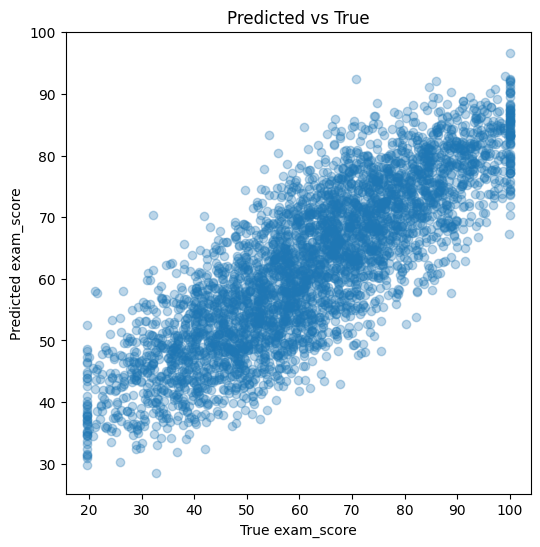

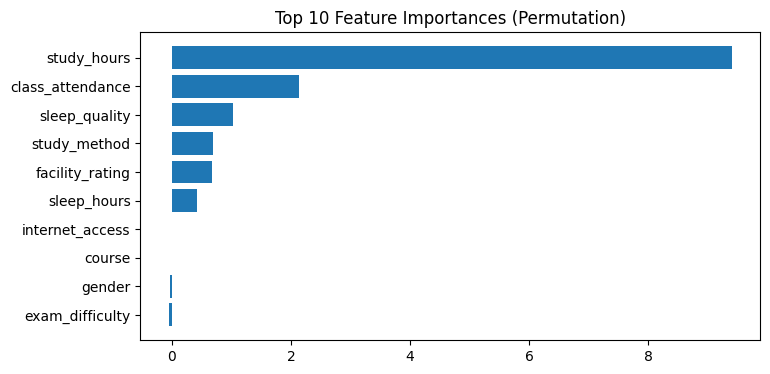

In [33]:
import matplotlib.pyplot as plt

# Pred vs True
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("True exam_score")
plt.ylabel("Predicted exam_score")
plt.title("Predicted vs True")
plt.show()

# Feature importance bar plot (top 10)
plt.figure(figsize=(8,4))
top = imp.head(10)[::-1]
plt.barh(top["feature"], top["importance_mean"])
plt.title("Top 10 Feature Importances (Permutation)")
plt.show()


In [34]:
error_df.sort_values("abs_error", ascending=False).head(5)



,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,y_true,y_pred,abs_error
11733,23,female,ba,5.29,70.6,yes,5.5,average,online videos,high,moderate,32.200,70.339778,38.139778
15298,24,other,bba,0.76,83.9,yes,4.2,good,coaching,low,easy,21.100,58.080827,36.980827
13604,19,other,diploma,2.52,73.8,yes,6.0,good,group study,low,moderate,21.500,57.715713,36.215713
6880,19,male,diploma,0.08,92.2,no,7.9,poor,self-study,medium,moderate,19.599,52.556645,32.957645
2879,24,other,ba,7.04,42.0,yes,9.3,good,group study,low,easy,99.800,67.268178,32.531822


In [35]:
imp.head(10)



,feature,importance_mean,importance_std
3,study_hours,9.410313,0.089064
4,class_attendance,2.136929,0.092709
7,sleep_quality,1.019855,0.069522
8,study_method,0.697072,0.058266
9,facility_rating,0.672568,0.049751
6,sleep_hours,0.426760,0.048741
5,internet_access,-0.000506,0.011234
2,course,-0.006059,0.030429
1,gender,-0.025273,0.038633
10,exam_difficulty,-0.057051,0.028242


In [36]:
perm = permutation_importance(
    best_model, X_test, y_test,
    n_repeats=10,
    random_state=42,
    scoring="neg_root_mean_squared_error"
)

imp = pd.DataFrame({
    "feature": X_test.columns,
    "importance_mean": perm.importances_mean,
    "importance_std": perm.importances_std
}).sort_values("importance_mean", ascending=False)

imp.head(10)

,feature,importance_mean,importance_std
3,study_hours,9.410313,0.089064
4,class_attendance,2.136929,0.092709
7,sleep_quality,1.019855,0.069522
8,study_method,0.697072,0.058266
9,facility_rating,0.672568,0.049751
6,sleep_hours,0.426760,0.048741
5,internet_access,-0.000506,0.011234
2,course,-0.006059,0.030429
1,gender,-0.025273,0.038633
10,exam_difficulty,-0.057051,0.028242


In [37]:
from joblib import dump, load

dump(best_model, "student_knn_pipeline.joblib")

# test load
loaded = load("student_knn_pipeline.joblib")
loaded.predict(X_test.head(3))


array([40.13080017, 74.78366979, 56.43853289])

In [38]:
def predict_one(model, row_dict):
    row = pd.DataFrame([row_dict])
    return float(model.predict(row)[0])

sample = {
    "age": 20,
    "gender": "male",
    "course": "bca",
    "study_hours": 4.0,
    "class_attendance": 75.0,
    "internet_access": "yes",
    "sleep_hours": 7.0,
    "sleep_quality": "average",
    "study_method": "self-study",
    "facility_rating": "medium",
    "exam_difficulty": "moderate"
}

print(predict_one(loaded, sample))


60.97298099656345


In [39]:
imp.head(10)

,feature,importance_mean,importance_std
3,study_hours,9.410313,0.089064
4,class_attendance,2.136929,0.092709
7,sleep_quality,1.019855,0.069522
8,study_method,0.697072,0.058266
9,facility_rating,0.672568,0.049751
6,sleep_hours,0.426760,0.048741
5,internet_access,-0.000506,0.011234
2,course,-0.006059,0.030429
1,gender,-0.025273,0.038633
10,exam_difficulty,-0.057051,0.028242


In [ ]:
y_pred = best_model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)                 # lower is better 
mse = mean_squared_error(y_test, y_pred)                  # lower is better
rmse = np.sqrt(mse)                                       # version-safe RMSE
r2 = r2_score(y_test, y_pred)                             # closer to 1 is better 

print(f"Final Test MAE : {mae:.3f}")
print(f"Final Test RMSE: {rmse:.3f}")
print(f"Final Test R²  : {r2:.3f}")

Final Test MAE : 8.823
Final Test RMSE: 10.881
Final Test R²  : 0.669


In [41]:
mean_score = y_test.mean()
print(f"RMSE as % of mean score: {(rmse/mean_score)*100:.2f}%")


RMSE as % of mean score: 17.44%


In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)                          
rmse = np.sqrt(mean_squared_error(y_test, y_pred))                
r2 = r2_score(y_test, y_pred)                                      
rmse_pct = (rmse / y_test.mean()) * 100

print("=== Final Test Metrics ===")
print(f"MAE      : {mae:.3f}")
print(f"RMSE     : {rmse:.3f}")
print(f"R²       : {r2:.3f}")
print(f"RMSE %   : {rmse_pct:.2f}% (of mean exam_score)")


=== Final Test Metrics ===
MAE      : 8.823
RMSE     : 10.881
R²       : 0.669
RMSE %   : 17.44% (of mean exam_score)


In [43]:
from joblib import dump, load

dump(best_model, "student_performance_knn.joblib")

# sanity check
loaded_model = load("student_performance_knn.joblib")
loaded_model.predict(X_test.head(2))


array([40.13080017, 74.78366979])